### Feature Extraction with Eigen Face

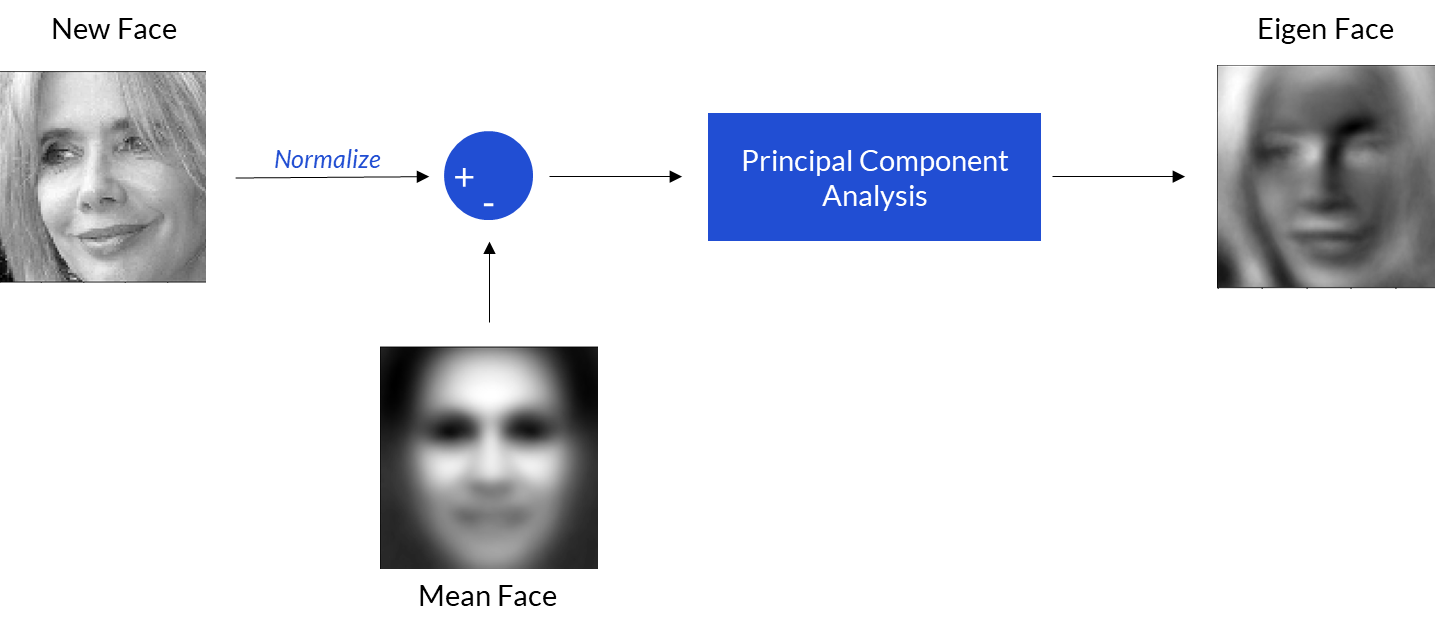

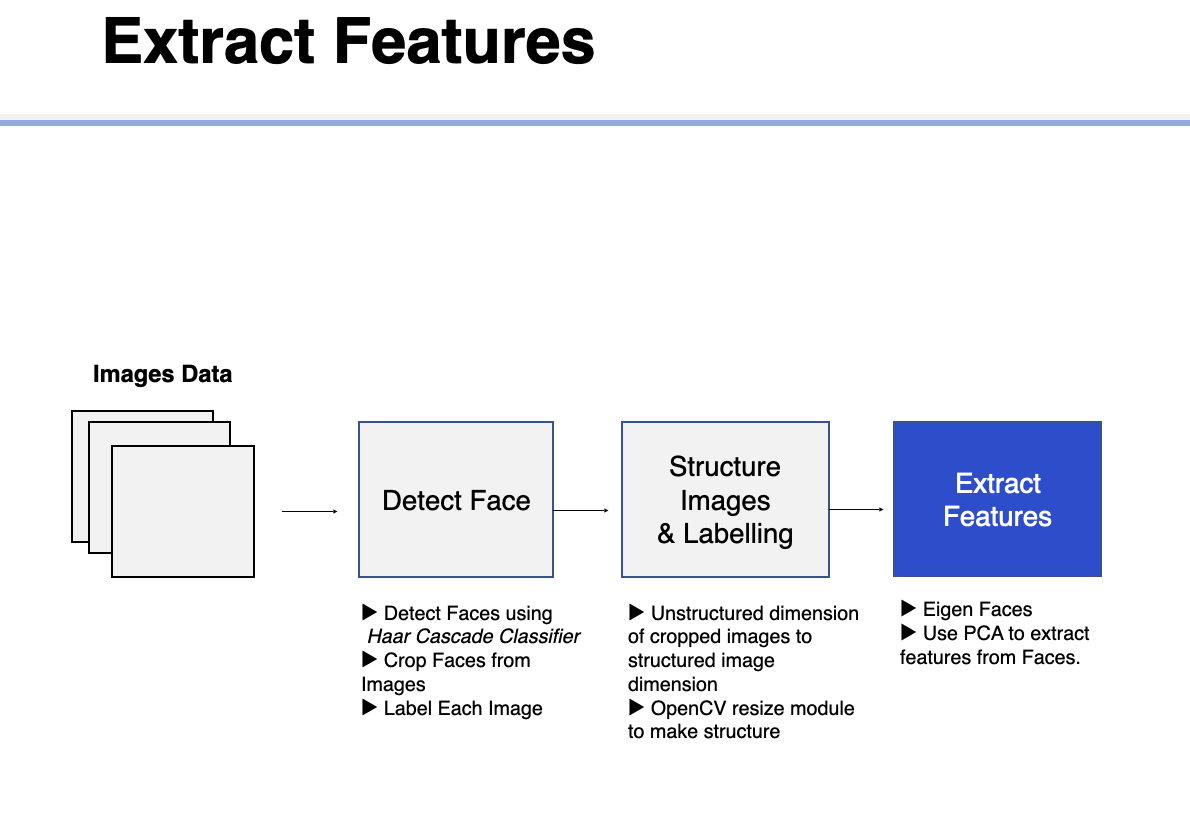

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

## Eigen Face
from sklearn.decomposition import PCA 

import pickle

In [3]:
# Load the data
data = pickle.load(open('./data/data_images_100_100.pickle',mode='rb')) # load the data

In [4]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.082353,0.074510,0.094118,0.098039,0.094118,0.109804,0.129412,0.180392,0.243137,0.266667,...,0.764706,0.760784,0.760784,0.760784,0.764706,0.764706,0.764706,0.764706,0.764706,female
1,0.066667,0.070588,0.050980,0.054902,0.125490,0.105882,0.098039,0.125490,0.125490,0.062745,...,0.109804,0.117647,0.117647,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,female
2,0.113725,0.082353,0.070588,0.062745,0.043137,0.098039,0.145098,0.121569,0.082353,0.145098,...,0.549020,0.552941,0.556863,0.552941,0.552941,0.556863,0.556863,0.556863,0.556863,female
4,0.180392,0.176471,0.160784,0.176471,0.176471,0.180392,0.168627,0.184314,0.203922,0.192157,...,0.721569,0.713725,0.733333,0.709804,0.701961,0.682353,0.639216,0.521569,0.741176,female
5,0.552941,0.580392,0.650980,0.717647,0.737255,0.686275,0.674510,0.678431,0.670588,0.654902,...,0.286275,0.196078,0.160784,0.176471,0.184314,0.278431,0.400000,0.505882,0.560784,female


##### Eigen Face

In [5]:
# Mean Face
X = data.drop('gender',axis=1).values # all images

In [6]:
X

array([[0.08235294, 0.0745098 , 0.09411765, ..., 0.76470588, 0.76470588,
        0.76470588],
       [0.06666667, 0.07058824, 0.05098039, ..., 0.11372549, 0.11372549,
        0.11372549],
       [0.11372549, 0.08235294, 0.07058824, ..., 0.55686275, 0.55686275,
        0.55686275],
       ...,
       [0.92941176, 0.93333333, 0.93333333, ..., 0.38431373, 0.43529412,
        0.4745098 ],
       [0.31764706, 0.65098039, 0.76862745, ..., 0.80784314, 0.96470588,
        0.95686275],
       [0.23137255, 0.22745098, 0.21568627, ..., 0.25098039, 0.24705882,
        0.24705882]], shape=(5434, 10000))

In [7]:
mean_face = X.mean(axis=0) # flatten mean face
mean_face.shape

(10000,)

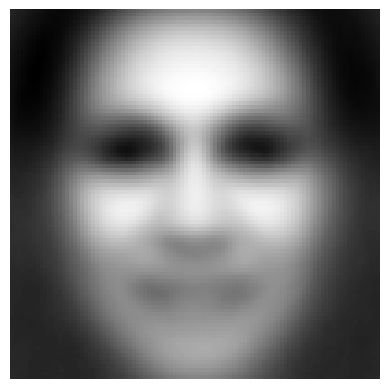

In [8]:
# visualize mean face
plt.imshow(mean_face.reshape((100,100)),cmap='gray')
plt.axis('off')
plt.show()

**Subtract data with mean face**

In [9]:
X_t = X - mean_face # transformed data

**Apply X_t data to PCA**

- Find the right number of component - Elbow
- With right number compnent computer Principal components

In [10]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
pca.fit(X_t)

,n_components,None
,copy,True
,whiten,True
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [11]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1,len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.252319,0.252319,1
1,0.113515,0.365833,2
2,0.104780,0.470613,3
3,0.051086,0.521699,4
4,0.032752,0.554452,5


In [12]:
exp_var_df.set_index('principal_components',inplace=True)

,explained_var,cum_explained_var,principal_components
principal_components,,,
1,0.252319,0.252319,1
2,0.113515,0.365833,2
3,0.104780,0.470613,3
4,0.051086,0.521699,4
5,0.032752,0.554452,5


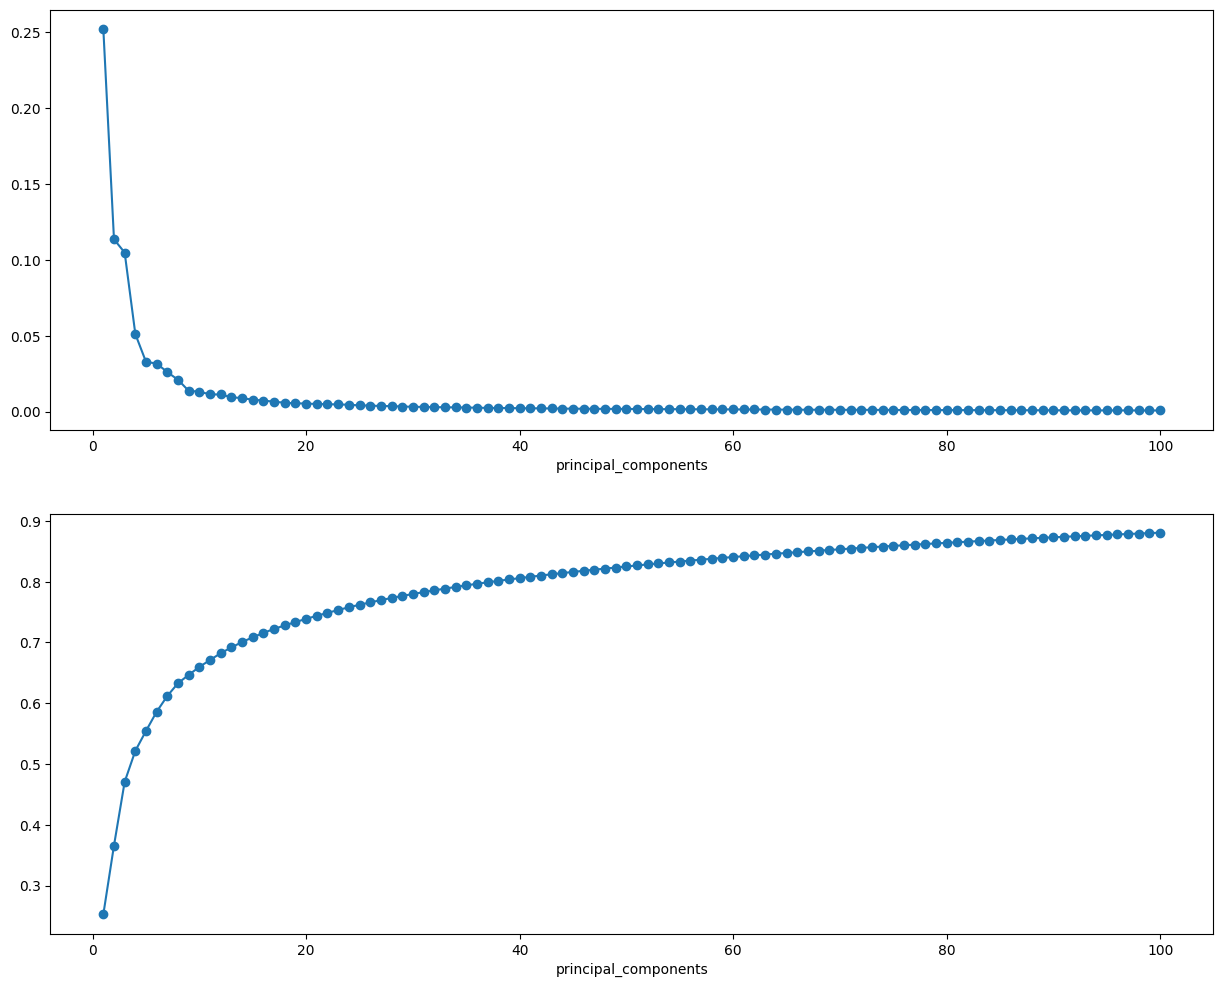

In [13]:
# visualize explained variance
fig, ax = plt.subplots(nrows=2,figsize=(15,12))

exp_var_df['explained_var'].head(100).plot(kind='line',marker='o',ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line',marker='o',ax=ax[1])
exp_var_df["principal_components"] = np.arange(1,len(exp_var_df) + 1)
exp_var_df.head()

From above plot, it is clear that with approximately **50 pricipal components having 80%** converage.

In [14]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)

In [15]:
pca_data.shape

(5434, 50)

In [16]:
# saving data and models
y = data['gender'].values # independent variables
np.savez('./data/data_pca_50_target',pca_data,y)

In [17]:
# saving the model
pca_dict = {'pca':pca_50,'mean_face':mean_face}

In [18]:
pickle.dump(pca_dict,open('model/pca_dict.pickle','wb'))

### Visualize Eigen Image

In [19]:
pca_data_inv = pca_50.inverse_transform(pca_data)

In [20]:
pca_data_inv.shape

(5434, 10000)

In [21]:
eig_img = pca_data_inv[0,:].reshape((100,100))
eig_img.shape

(100, 100)

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

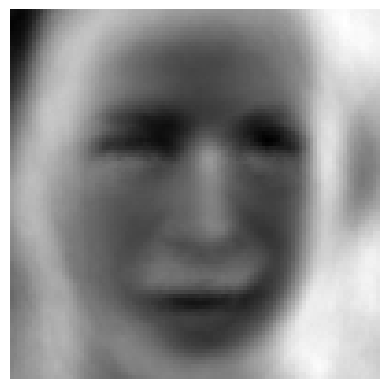

In [22]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')

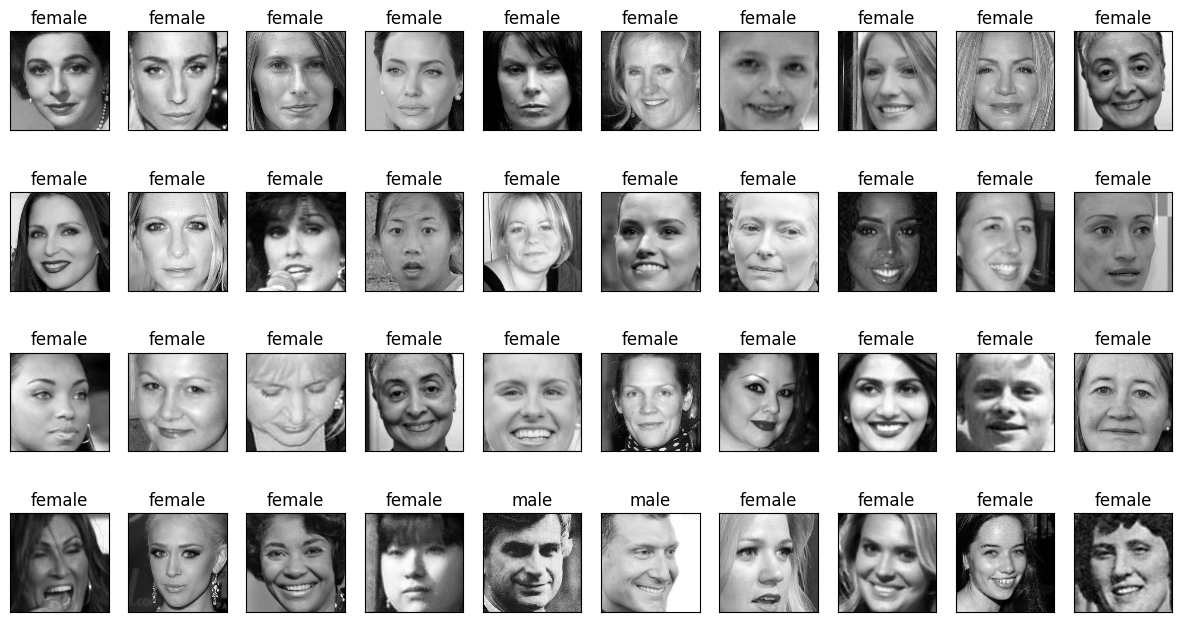

====================Eigen Images====================


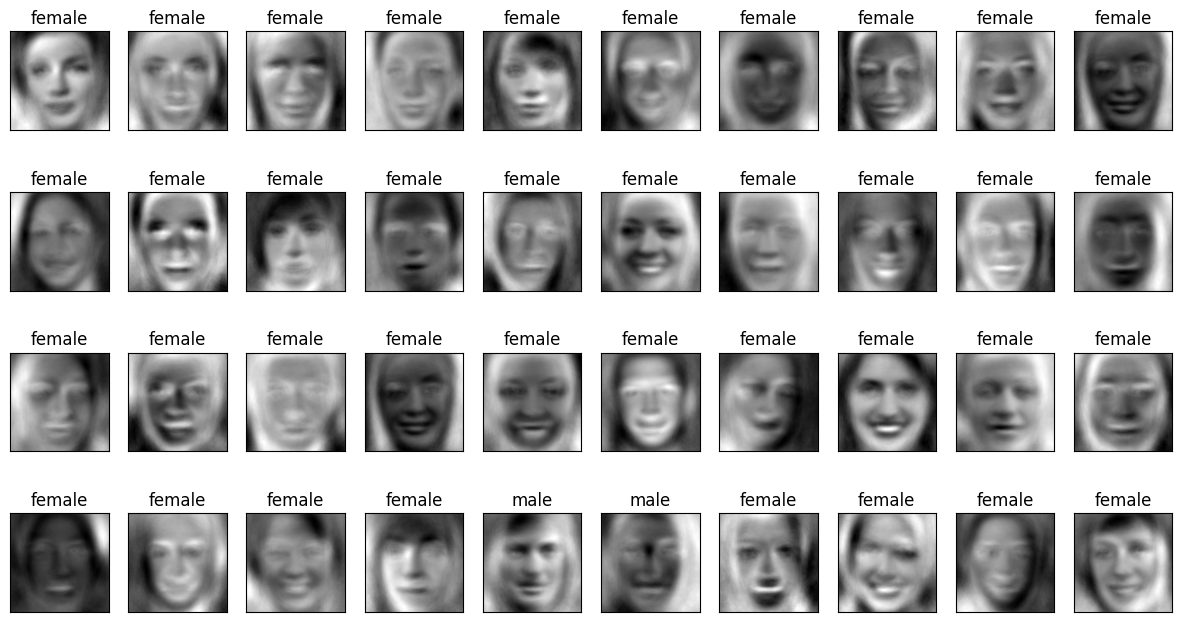

In [24]:
np.random.seed(1001)
pics = np.random.randint(0,4319,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()